# Skillbox — Мастер-класс. Разведочный анализ данных + Подготовка отчётов — Kiva.org
***

# Домашнее задание
***

Это домашнее задание призвано укрепить ваши знания EDA. Давайте вернёмся к примеру с компанией Kiva. 

Для начала вспомним, чем занимается компания.

#  1. Kiva и её деятельность
***
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Kiva.org_logo_2016.svg/640px-Kiva.org_logo_2016.svg.png" width="500" height="200" />

Kiva — это некоммерческая организация, которая позволяет нуждающимся более чем в 80 странах мира получать финансирование под различного рода проекты и нужды.

Девиз Kiva — **Make a loan, change a life**.

В основном деятельность Kiva связана с поддержкой населения, развитием малого бизнеса, а также финансированием социальных проектов. 

Список заявок, назначений и стран, нуждающихся в финансировании, можно посмотреть на сайте [kiva.org](https://www.kiva.org).
Это темы, так или иначе связанные с сельским хозяйством, питанием, здоровьем и гигиеной, розничной торговлей и поддержкой малого бизнеса.


## 1.1. Kiva в цифрах
***

**На сегодняшний день Kiva выделила более одного миллиарда долларов двум миллионам заемщиков и считается одним из главных участников борьбы с бедностью, особенно во многих африканских странах.**

* За время существования Кива помогла 2,7 млн нуждающимся
* 1,7 млн небезразличных участников, желающих помочь
* 83 страны
* Сумма средств, выделенных через Kiva, составляет $1,11 млрд
* 97,0% — доля возврата средств инвесторам (очень высокий показатель)
* 81% заемщиков Kiva — женщины
* Кредит Kiva финансируется каждые две минуты

## 1.2. Как работает Kiva
***

<img src="https://miro.medium.com/max/1400/1*I-5sWkHtvaSSkYfCs-PptA.png" width="1024" height="737" />

## 1.3. Набор данных от Kiva
***

**kiva_loans** — это набор данных, который содержит большую часть информации о займах:
- id — уникальный идентификатор для кредита;
- funded_amount — сумма, выплаченная Kiva агенту на местах (USD);
- loan_amount — сумма, выплаченная полевым агентом заёмщику (USD);
- sector — сектор использования займа;
- activity — более гранулированная категория;
- use — назначение использования суммы кредита;
- country_code — ISO-код страны страны, в которой был выдан заём;
- country — полное название страны, в которой был выдан кредит;
- posted_time — время, в которое заявка была опубликована на Kiva;
- disbursed_time — время, когда кредитный агент выдал заёмщику сумму;
- funded_time — время, когда заявка полностью финансируется кредиторами;
- term_in_months — срок, на который был выдан кредит, в месяцах;
- lender_count — общее количество кредиторов, которые внесли свой вклад в этот кредит;
- loaner_genders — разделённые запятыми буквы M и F, где каждый экземпляр представляет одного мужчину / одну женщину в группе.

**kiva_mpi_region_locations** — набор данных, содержащий данные о регионах и показатели MPI. Global Multidimensional Poverty Index — глобальный индекс бедности ряда регионов (субнациональных) в мире. Чем больше это значение, тем выше бедность в соответствующем регионе:
- country — страна;
- region — регион в стране;
- world_region — часть света;
- MPI — многомерный индекс бедности;
- geo — координаты (широта, долгота).




# 2. Разведочный анализ данных
***

Для выполнения работы сохраните копию на свой диск, нажав на кнопку «Файл» в верхней панели и выбрав «Сохранить копию на диск».

## Импорт библиотек

In [2]:
! conda install missingno --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: D:\Anaconda

  added / updated specs:
    - missingno


The following packages will be UPDATED:

  missingno          conda-forge/label/cf201901::missingno~ --> conda-forge::missingno-0.4.2-py_1 





Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


ЌҐ г¤ Ґвбп ­ ©вЁ C:\WINDOWS\TEMP\tmpwj1c6mss.bat


In [5]:
import numpy as np
import pandas as pd
import math
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')

import os
# import missingno as msno

C:\Windows\Temp\ipykernel_11084\147558330.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


## Загрузка данных

Для удобства можно загрузить данные в колаб, предварительно их заархивировав, а затем использовать команду `!unzip kiva_loans.csv.zip`.





In [6]:
df_kiva_loans = pd.read_csv("kiva_loans.csv")
df_mpi = pd.read_csv("kiva_mpi_region_locations.csv")

_________

### Задание 1. Проверьте, что данные загрузились корректно, выведя на экран первые три строчки каждого датасета.

In [7]:
print(df_kiva_loans.head(3))
print('---------------------')
print(df_mpi.head(3))

       id  funded_amount  loan_amount             activity          sector  \
0  653051          300.0        300.0  Fruits & Vegetables            Food   
1  653053          575.0        575.0             Rickshaw  Transportation   
2  653068          150.0        150.0       Transportation  Transportation   

                                                 use country_code   country  \
0            To buy seasonal, fresh fruits to sell.            PK  Pakistan   
1  to repair and maintain the auto rickshaw used ...           PK  Pakistan   
2  To repair their old cycle-van and buy another ...           IN     India   

      region currency  partner_id                posted_time  \
0     Lahore      PKR       247.0  2014-01-01 06:12:39+00:00   
1     Lahore      PKR       247.0  2014-01-01 06:51:08+00:00   
2  Maynaguri      INR       334.0  2014-01-01 09:58:07+00:00   

              disbursed_time                funded_time  term_in_months  \
0  2013-12-17 08:00:00+00:00  2014-01-

Отлично! Данные загружены верно. Теперь давайте посмотрим, присутствуют ли в них пропуски. 
### Задание 2. Сделайте визуализацию для проверки наличия пропусков в двух наборах данных 

Используйте метод, показанный в лонгриде:

```
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis');
```



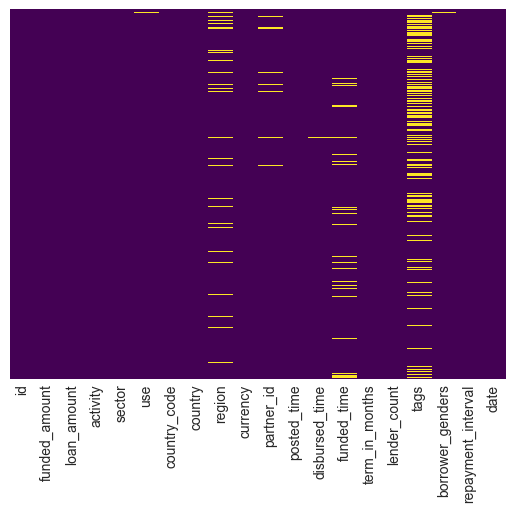

In [10]:
sns.heatmap(df_kiva_loans.isnull(),cbar=False,yticklabels=False,cmap = 'viridis');

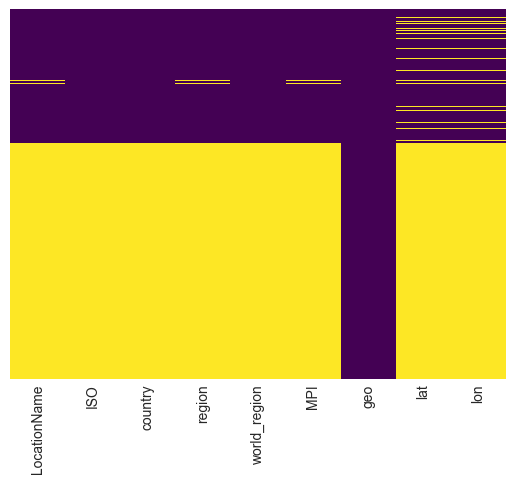

In [11]:
sns.heatmap(df_mpi.isnull(),cbar=False,yticklabels=False,cmap = 'viridis');

**Что мы видим?**

В некоторых колонках присутствуют пропуски. 

Помимо визуализаций, наличие пропусков можно отследить с помощью метода ```info()```. 

### Задание 3. Попробуйте применить данный метод к нашим таблицам и сравните число ненулевых значений каждого признака с количеством строк датасетов



In [13]:
df_kiva_loans.info()
print('--------------------------')
df_mpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

Помимо числа ненулевых значений каждого столбца, мы сразу можем отследить, к какому типу данных относятся признаки.

Так как пропусков в данных немного, давайте выбросим строки, содержащие NaN.
### Задание 4. С помощью метода ```dropna``` удалите строки с пропусками из датасетов

*Подсказка: чтобы не перезаписывать данные ```(data=data.dropna())```, используйте параметр ```inplace = True```*.

In [14]:
df_kiva_loans.dropna(inplace = True)

In [15]:
df_mpi.dropna(inplace = True)

Посчитайте количество записей в таблицах после удаления строк, содержащих NaN.

In [16]:
df_kiva_loans.info()
print('--------------------------')
df_mpi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423081 entries, 2 to 671141
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  423081 non-null  int64  
 1   funded_amount       423081 non-null  float64
 2   loan_amount         423081 non-null  float64
 3   activity            423081 non-null  object 
 4   sector              423081 non-null  object 
 5   use                 423081 non-null  object 
 6   country_code        423081 non-null  object 
 7   country             423081 non-null  object 
 8   region              423081 non-null  object 
 9   currency            423081 non-null  object 
 10  partner_id          423081 non-null  float64
 11  posted_time         423081 non-null  object 
 12  disbursed_time      423081 non-null  object 
 13  funded_time         423081 non-null  object 
 14  term_in_months      423081 non-null  float64
 15  lender_count        423081 non-nul

_____________

## Пользователи Kiva

Теперь, когда мы знаем, какие типы признаков присутствуют в данных, когда все пропуски обработаны, настало время перейти к постановке гипотез и их проверке.


In [18]:
print(df_kiva_loans.head(3))

       id  funded_amount  loan_amount        activity          sector  \
2  653068          150.0        150.0  Transportation  Transportation   
6  653067          200.0        200.0           Dairy     Agriculture   
7  653078          400.0        400.0    Beauty Salon        Services   

                                                 use country_code   country  \
2  To repair their old cycle-van and buy another ...           IN     India   
6  To purchase a dairy cow and start a milk produ...           IN     India   
7         to buy more hair and skin care products.             PK  Pakistan   

      region currency  partner_id                posted_time  \
2  Maynaguri      INR       334.0  2014-01-01 09:58:07+00:00   
6  Maynaguri      INR       334.0  2014-01-01 09:51:02+00:00   
7  Ellahabad      PKR       245.0  2014-01-01 11:46:01+00:00   

              disbursed_time                funded_time  term_in_months  \
2  2013-12-17 08:00:00+00:00  2014-01-01 16:01:36+00:00   

### Задание 1. Используя таблицу ```df_kiva_loans```, попробуйте найти связь между сроком кредита (**term_in_months**), количеством кредиторов, которые внесли свой вклад в этот кредит, (**lender_count**) и суммой займа (**loan_amount**). Какие выводы можно сделать из этих данных? 

**Для этого**:

1. Выделите три указанных столбца в отдельную таблицу `df_temp`.
2. Найдите корреляцию между признаками с помощью команды `df_temp.corr()`, сохраните полученные значения в переменную `df_corr`.
3. Используя метод `heatmap` библиотеки `seaborn`, визуализируйте полученный результат, для наглядности задайте параметры `cmap='BrBG', annot=True`.




<AxesSubplot: >

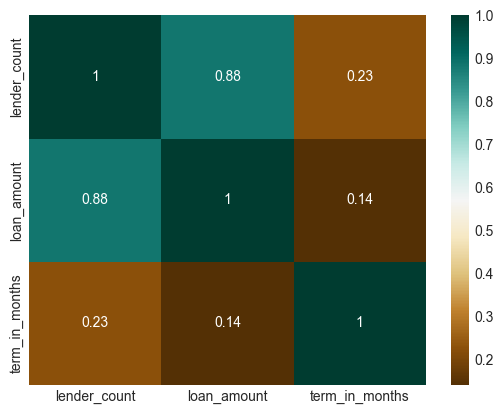

In [23]:
# Выделите три указанных столбца в отдельную таблицу df_temp.
df_temp = df_kiva_loans[['lender_count','loan_amount','term_in_months']]

# Найдите корреляцию между признаками с помощью команды df_temp.corr(), сохраните полученные значения в переменную df_corr.
df_corr = df_temp.corr()

# Используя метод heatmap библиотеки seaborn, визуализируйте полученный результат, для наглядности задайте параметры cmap='BrBG', annot=True.
sns.heatmap(df_corr, cmap='BrBG', annot=True)

Вывод: Проанализировав данные, можно сделать вывод, что сумма займа является прямо пропорциональной сроку кредита. Также можно заметить, что чем больше сумма кредита, тем больше количество кредиторов, принявших участие в его обеспечении

### Задание 2. Проанализируйте разброс показателя **funded_amount** путём построения визуализации

Иcпользуйте метод `histplot` библиотеки `seaborn`.

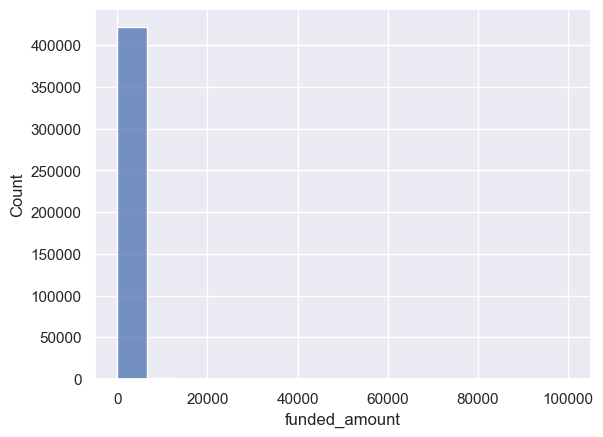

In [34]:
ax = sns.histplot(data=df_kiva_loans, x='funded_amount', bins=15)

### Задание 3. Изучите несколько займов с большими суммами (> 20 000). Что можно сказать о назначении этих заявок? В каких странах они оформлены? 

Подсказка: для того чтобы выделить объекты с большими суммами, можно воспользоваться командой `df_kiva_loans[df_kiva_loans.loan_amount > 20000]`.

In [ ]:
df_kiva_loans[df_kiva_loans.loan_amount > 20000]

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
34196,687045,50000.0,50000.0,Renewable Energy Products,Retail,to buy and sell Barefoot Power's Solar Lightin...,PE,Peru,Arequipa,USD,212.0,2014-03-21 05:25:02+00:00,2014-05-21 07:00:00+00:00,2014-04-18 06:32:55+00:00,14.0,1446,"user_favorite, user_favorite, #Eco-friendly, #...",male,irregular,2014-03-21
38725,691328,25000.0,25000.0,Construction Supplies,Construction,To supply construction materials for a vocatio...,RW,Rwanda,Kigali,USD,319.0,2014-03-31 09:43:06+00:00,2014-03-26 07:00:00+00:00,2014-04-16 22:14:29+00:00,7.0,821,"user_favorite, #Repeat Borrower, #Unique, #Job...",male,irregular,2014-03-31
43182,695450,50000.0,50000.0,Renewable Energy Products,Retail,To buy and sell Barefoot Power's solar lightin...,KE,Kenya,Nairobi,USD,212.0,2014-04-09 08:25:02+00:00,2014-06-09 07:00:00+00:00,2014-04-19 19:27:30+00:00,16.0,1491,"user_favorite, user_favorite, user_favorite, u...",male,bullet,2014-04-09
53634,706146,50000.0,50000.0,Renewable Energy Products,Retail,To buy and sell Barefoot Power solar lighting.,UG,Uganda,Kampala,USD,212.0,2014-05-06 09:25:03+00:00,2014-07-06 07:00:00+00:00,2014-05-18 15:31:08+00:00,14.0,1581,"#Eco-friendly, #Biz Durable Asset, #Post-disbu...",female,bullet,2014-05-06
70499,722883,100000.0,100000.0,Agriculture,Agriculture,create more than 300 jobs for women and farmer...,HT,Haiti,Les Cayes,USD,315.0,2014-06-10 19:25:02+00:00,2014-09-08 07:00:00+00:00,2014-06-19 20:21:04+00:00,75.0,2986,"user_favorite, user_favorite, user_favorite, u...",female,irregular,2014-06-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636486,1298882,36000.0,36000.0,Manufacturing,Manufacturing,to provide more jobs and training to unskilled...,KE,Kenya,Kiambu,USD,529.0,2017-05-15 22:12:57+00:00,2017-06-30 07:00:00+00:00,2017-06-01 16:27:12+00:00,20.0,1180,"user_favorite, user_favorite, user_favorite, u...",male,irregular,2017-05-15
636999,1299524,30000.0,30000.0,Renewable Energy Products,Retail,to purchase solar lanterns and solar home syst...,SL,Sierra Leone,Freetown,USD,531.0,2017-05-16 18:33:34+00:00,2017-06-30 07:00:00+00:00,2017-05-22 16:01:34+00:00,14.0,588,"#Eco-friendly, #Technology, user_favorite, use...",male,irregular,2017-05-16
637572,1300389,30000.0,30000.0,Agriculture,Agriculture,increase smallholder farmers’ incomes by buyin...,UG,Uganda,Kampala,USD,530.0,2017-05-17 20:00:42+00:00,2017-06-30 07:00:00+00:00,2017-05-22 09:30:49+00:00,20.0,970,"user_favorite, user_favorite, user_favorite, u...",male,irregular,2017-05-17
660211,1322535,25000.0,25000.0,Food,Food,to increase the company's production capacity ...,GH,Ghana,Accra,USD,535.0,2017-06-19 07:44:23+00:00,2017-08-31 07:00:00+00:00,2017-06-22 04:10:44+00:00,14.0,785,"user_favorite, user_favorite, user_favorite, #...",female,irregular,2017-06-19


____________

## Многомерный уровень бедности

In [36]:
print(df_mpi.head())

              LocationName  ISO      country      region world_region    MPI  \
0  Badakhshan, Afghanistan  AFG  Afghanistan  Badakhshan   South Asia  0.387   
1     Badghis, Afghanistan  AFG  Afghanistan     Badghis   South Asia  0.466   
2     Baghlan, Afghanistan  AFG  Afghanistan     Baghlan   South Asia  0.300   
3       Balkh, Afghanistan  AFG  Afghanistan       Balkh   South Asia  0.301   
4      Bamyan, Afghanistan  AFG  Afghanistan      Bamyan   South Asia  0.325   

                               geo        lat        lon  
0  (36.7347725, 70.81199529999999)  36.734772  70.811995  
1         (35.1671339, 63.7695384)  35.167134  63.769538  
2         (35.8042947, 69.2877535)  35.804295  69.287754  
3         (36.7550603, 66.8975372)  36.755060  66.897537  
4         (34.8100067, 67.8212104)  34.810007  67.821210  


### Задание 1. Найдите топ-5 регионов по среднему уровню бедности. Для этого сгруппируйте данные таблицы ```df_mpi``` по параметру **region** и найдите среднее значение **MPI** по группам

*Подсказка: для сортировки данных типа ```Series`` от большего значения к меньшему` , используйте метод ```sort_values``` с параметром `ascending = False`*.

In [37]:
grouped_regions = df_mpi.groupby('region')['MPI'].mean()
top_5_regions = grouped_regions.sort_values(ascending = False).head(5)
print (top_5_regions)

region
Lac          0.744
Wadi Fira    0.709
Sila         0.697
Kanem        0.696
Sahel        0.690
Name: MPI, dtype: float64


### Задание 2. Постройте диаграму показателя **MPI** (многомерный индекс бедности) в разных странах

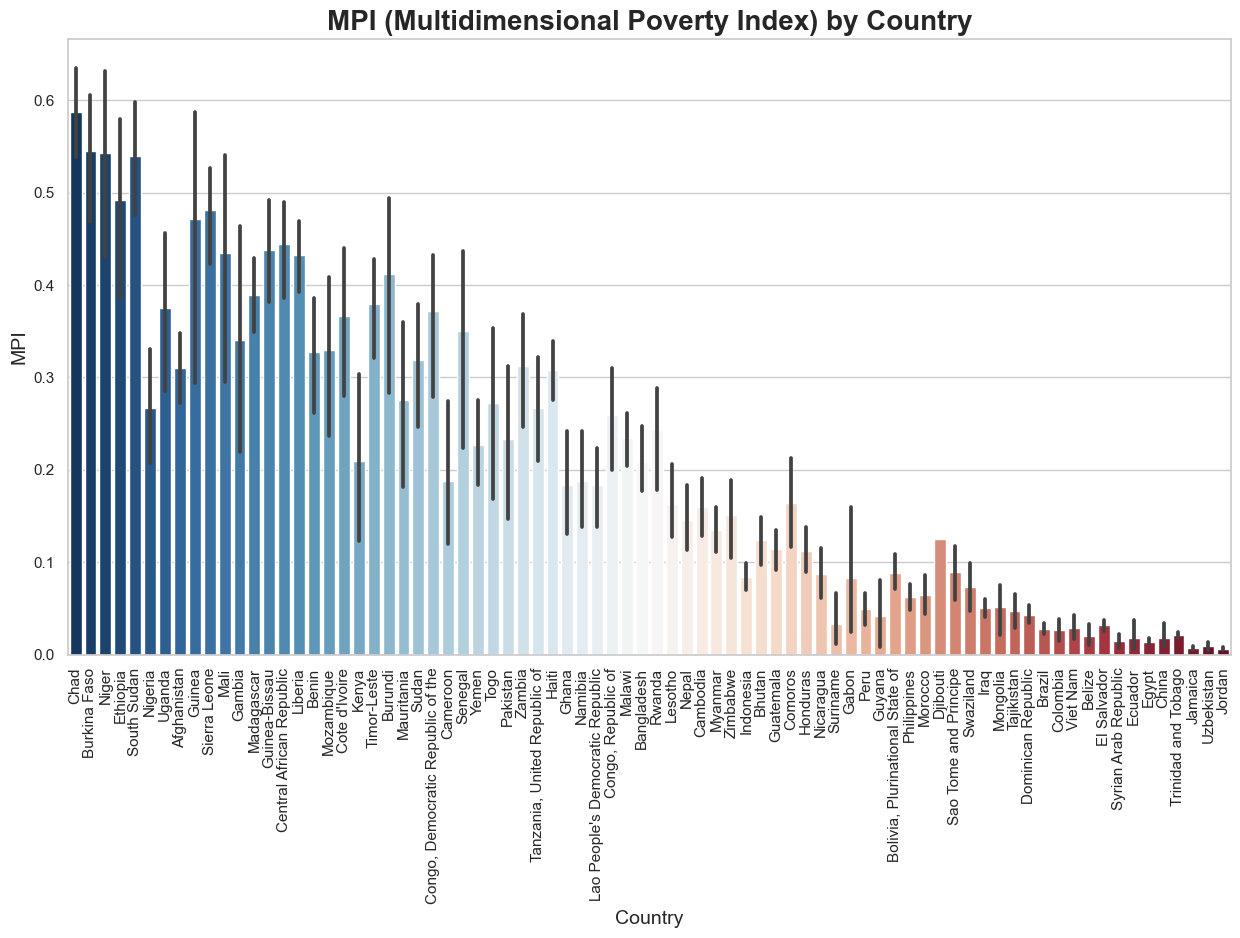

In [38]:
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(15,8))

sns.barplot(x='country', y='MPI', data=df_mpi.sort_values(by='MPI', ascending=False), palette='RdBu_r')

plt.title('MPI (Multidimensional Poverty Index) by Country', fontsize=20, fontweight='bold') 
plt.xlabel('Country', fontsize=14)
plt.ylabel('MPI', fontsize=14)
plt.xticks(rotation=90)
plt.show()